In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Bidirectional, Dense

# Sample input shape (batch_size, time_steps, features)
input_shape = (None, 10, 20)  # (batch, sequence length, features)

# Define model
model = Sequential([
    Bidirectional(SimpleRNN(64, return_sequences=True), input_shape=(10, 20)),
    Bidirectional(SimpleRNN(32)),
    Dense(10, activation='softmax')  # Output layer for classification
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 10, 128)             │          10,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,834 (85.29 KB)

 Trainable params: 21,834 (85.29 KB)

 Non-trainable params: 0 (0.00 B)

In [2]:
import torch
import torch.nn as nn

class BiRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(BiRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply by 2 for bidirectional

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Take the last time step output
        return out

# Example usage
model = BiRNN(input_size=20, hidden_size=64, num_classes=10)
print(model)

BiRNN(
  (rnn): RNN(20, 64, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=128, out_features=10, bias=True)
)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0693 - loss: 2.4537
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1368 - loss: 2.2768
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1485 - loss: 2.1256
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2428 - loss: 1.9791
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4546 - loss: 1.8086
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4450 - loss: 1.6596
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6434 - loss: 1.4785
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7062 - loss: 1.3804
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8861 - loss: 1.1689
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8339 - loss: 1.0987


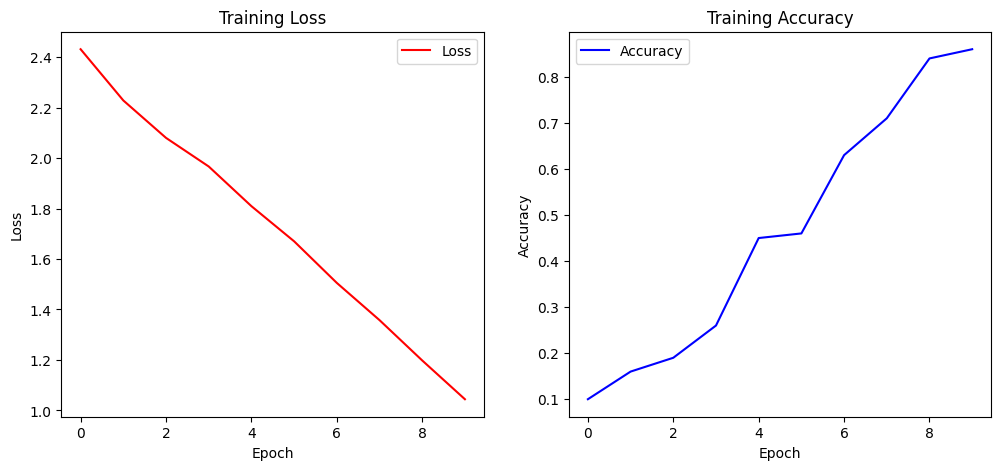


PyTorch Model Outputs:
Final Output Shape: torch.Size([5, 10])
Sequence Outputs Shape: torch.Size([5, 10, 128])
Final Hidden State Shape: torch.Size([5, 128])
Hidden State Shape: torch.Size([2, 5, 64])


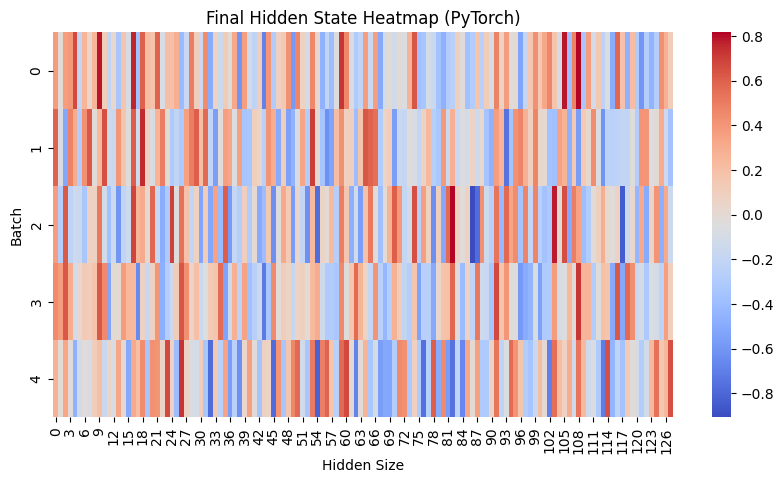

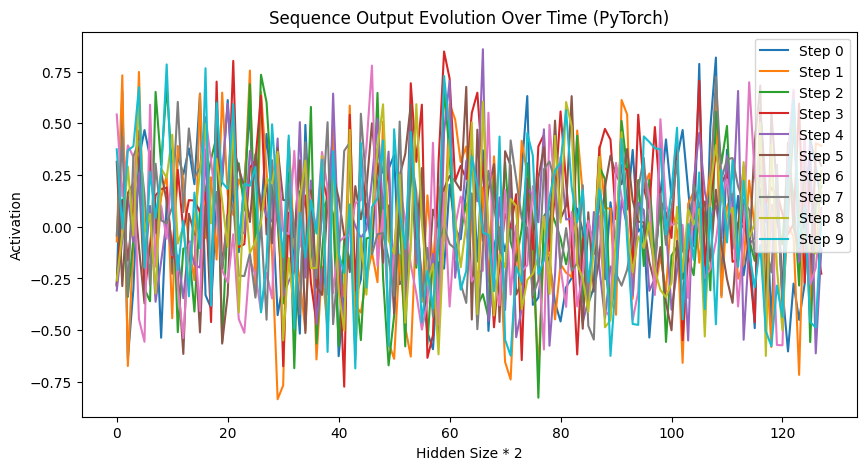

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Bidirectional, Dense
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================== #
#    TensorFlow/Keras Model   #
# =========================== #
def build_tf_birnn(input_shape, hidden_size, num_classes):
    inputs = Input(shape=input_shape)

    # BiRNN Layer without return_state
    birnn_layer = Bidirectional(SimpleRNN(hidden_size, return_sequences=False))(inputs)

    # Fully connected layer
    outputs = Dense(num_classes, activation='softmax')(birnn_layer)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Create Model
tf_model = build_tf_birnn(input_shape=(10, 20), hidden_size=64, num_classes=10)

# Generate Dummy Dataset
x_train = np.random.rand(100, 10, 20)
y_train = np.random.randint(0, 10, 100)
y_train = tf.keras.utils.to_categorical(y_train, 10)

# Train Model
history = tf_model.fit(x_train, y_train, epochs=10, batch_size=8, verbose=1)

# =========================== #
#   Plot Training Curves      #
# =========================== #
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()

# ======================== #
#    PyTorch BiRNN Model   #
# ======================== #
class BiRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(BiRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        out, hidden = self.rnn(x)

        # Extract last forward & backward hidden states
        forward_h = hidden[-2, :, :]
        backward_h = hidden[-1, :, :]

        # Concatenate forward and backward hidden states
        final_hidden_state = torch.cat((forward_h, backward_h), dim=1)

        # Fully connected layer for final prediction
        output = self.fc(final_hidden_state)

        return output, out, final_hidden_state, hidden

# Create PyTorch Model
pytorch_model = BiRNN(input_size=20, hidden_size=64, num_classes=10)

# Sample Data
x_torch = torch.randn(5, 10, 20)  # (batch_size, sequence_length, input_size)
output, seq_outputs, final_hidden_state, hidden = pytorch_model(x_torch)

print("\nPyTorch Model Outputs:")
print("Final Output Shape:", output.shape)
print("Sequence Outputs Shape:", seq_outputs.shape)
print("Final Hidden State Shape:", final_hidden_state.shape)
print("Hidden State Shape:", hidden.shape)

# =========================== #
#   Visualizing Hidden States #
# =========================== #
plt.figure(figsize=(10, 5))
sns.heatmap(final_hidden_state.detach().numpy(), cmap="coolwarm", annot=False)
plt.title("Final Hidden State Heatmap (PyTorch)")
plt.xlabel("Hidden Size")
plt.ylabel("Batch")
plt.show()

# =========================== #
#   Visualizing Sequence Output #
# =========================== #
plt.figure(figsize=(10, 5))
for i in range(seq_outputs.shape[1]):  # Iterate over sequence length
    plt.plot(seq_outputs[0, i, :].detach().numpy(), label=f"Step {i}")

plt.title("Sequence Output Evolution Over Time (PyTorch)")
plt.xlabel("Hidden Size * 2")
plt.ylabel("Activation")
plt.legend(loc='upper right')
plt.show()